This script contains the following:
1. Import Libraries and data
2. Extract the Date and Month Column
3. Subset the data to scale it
4. Merge Dataframes into one dataframe
5. Filter DataFrame to include only data from the 1990's 
6. Dendrograms
7. Dendogram Ward Method on all weather stations for all years
8. PCA - All Weather Stations for 1960 - 2022
9. PCA - BASEL Weather Station - 1990's
10. PCA - HEATHROW Weather Station - 1990's
11. PCA - OSLO Weather Station - 1990's

## Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
## Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\ClimateWins'

In [3]:
# Import Dataset-weather-prediction-dataset-processed.csv
climate=pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [4]:
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [5]:
climate.shape

(22950, 170)

In [6]:
# Drop the columns for GDANSK, ROMA, and TOURS from the scaled data set
climate2 = climate.drop(columns=['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'])

In [7]:
climate2.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 149 columns]

In [8]:
climate2.shape

(22950, 149)

In [9]:
# Import Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv
answers=pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [10]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [11]:
answers.shape

(22950, 16)

In [12]:
# Check the min

answers['BASEL_pleasant_weather'].min()

0

In [13]:
# Check the max

answers['BASEL_pleasant_weather'].max()

1

In [14]:
for val in [
    answers['BASEL_pleasant_weather'], 
    answers['BELGRADE_pleasant_weather'], 
    answers['BUDAPEST_pleasant_weather'], 
    answers['DEBILT_pleasant_weather'], 
    answers['DUSSELDORF_pleasant_weather'], 
    answers['HEATHROW_pleasant_weather'], 
    answers['KASSEL_pleasant_weather'], 
    answers['LJUBLJANA_pleasant_weather'], 
    answers['MAASTRICHT_pleasant_weather'], 
    answers['MADRID_pleasant_weather'], 
    answers['MUNCHENB_pleasant_weather'], 
    answers['OSLO_pleasant_weather'], 
    answers['SONNBLICK_pleasant_weather'], 
    answers['STOCKHOLM_pleasant_weather'], 
    answers['VALENTIA_pleasant_weather']
]:
    print(val.unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]


In [15]:
# Map each weather station pleasant_weather to a name with a dictionary.
weather_class = {0:'unpleasant', 1:'pleasant'}

answers[['BASEL_weather', 'BELGRADE_weather', 'BUDAPEST_weather', 'DEBILT_weather', 'DUSSELDORF_weather', 'HEATHROW_weather', 'KASSEL_weather', 'LJUBLJANA_weather', 'MAASTRICHT_weather', 'MADRID_weather', 'MUNCHENB_weather', 'OSLO_weather', 'SONNBLICK_weather', 'STOCKHOLM_weather', 'VALENTIA_weather']] = [
    weather_class[val.values[0]]  # Map both 0 and 1 to their respective categories
    if val.values[0] in weather_class  # Check if the value is present in the mapping dictionary
    else val.values[0]  # Otherwise, keep the original value
    for val in [
        answers['BASEL_pleasant_weather'], 
        answers['BELGRADE_pleasant_weather'], 
        answers['BUDAPEST_pleasant_weather'], 
        answers['DEBILT_pleasant_weather'], 
        answers['DUSSELDORF_pleasant_weather'], 
        answers['HEATHROW_pleasant_weather'], 
        answers['KASSEL_pleasant_weather'], 
        answers['LJUBLJANA_pleasant_weather'], 
        answers['MAASTRICHT_pleasant_weather'], 
        answers['MADRID_pleasant_weather'], 
        answers['MUNCHENB_pleasant_weather'], 
        answers['OSLO_pleasant_weather'], 
        answers['SONNBLICK_pleasant_weather'], 
        answers['STOCKHOLM_pleasant_weather'], 
        answers['VALENTIA_pleasant_weather']
    ]
]

In [16]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  ...  HEATHROW_weather  KASSEL_weather  \
0                            0  ...        unpleasant      unpleasant   
1                            0  ...        unpleasant      unpleasant   
2                            0  ...        unpleasant      unpleasant   
3                            0  ...        unpleasant      unpleasant   
4                            0  ...        unpleasant      unpleasant   

   LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  MUNCHENB_weather  \
0         unpleasant          unpleasant      unpleasant        unpleasant   
1         unpleasant          unpleasant      unpleasant        unpleasant   
2         unpleasant          unpleasant      unpleasant        unpleasant   
3         unpleasant          unpleasant      unpleasant        unpleasant   
4         unpleasant          unpleasant      unpleasant        unpleasant   

  OSLO_weather SONNBLICK_weather STOCKHOLM_weather VALENTIA_weather  
0   unpleasant        unpleasant        unpleasant       unpleasant  
1   unpleasant        unpleasant        unpleasant       unpleasant  
2   unpleasant        unpleasant        unpleasant       unpleasant  
3   unpleasant        unpleasant        unpleasant       unpleasant  
4   unpleasant        unpleasant        unpleasant       unpleasant  

[5 rows x 31 columns]

In [17]:
# Check the min

answers['BASEL_pleasant_weather'].min()

0

In [18]:
# Check the max

answers['BASEL_pleasant_weather'].max()

1

In [19]:
for val in [
    answers['BASEL_pleasant_weather'], 
    answers['BELGRADE_pleasant_weather'], 
    answers['BUDAPEST_pleasant_weather'], 
    answers['DEBILT_pleasant_weather'], 
    answers['DUSSELDORF_pleasant_weather'], 
    answers['HEATHROW_pleasant_weather'], 
    answers['KASSEL_pleasant_weather'], 
    answers['LJUBLJANA_pleasant_weather'], 
    answers['MAASTRICHT_pleasant_weather'], 
    answers['MADRID_pleasant_weather'], 
    answers['MUNCHENB_pleasant_weather'], 
    answers['OSLO_pleasant_weather'], 
    answers['SONNBLICK_pleasant_weather'], 
    answers['STOCKHOLM_pleasant_weather'], 
    answers['VALENTIA_pleasant_weather']
]:
    print(val.unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0]
[0 1]
[0 1]


## Extract the Date and Month Column

In [20]:
dates = climate2[['DATE', 'MONTH']]

In [21]:
dates.head()

DATE  MONTH
0  19600101      1
1  19600102      1
2  19600103      1
3  19600104      1
4  19600105      1

## Subset the data to scale it

In [22]:
# Drop the date and month column from the original data
df_subset = climate2.drop(columns=['DATE', 'MONTH'])

In [23]:
df_subset.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0                  7               2.1            0.85           1.018   
1                  6               2.1            0.84           1.018   
2                  8               2.1            0.90           1.018   
3                  3               2.1            0.92           1.018   
4                  6               2.1            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                    0.32                 0.09                 0   
1                    0.36                 1.05                 0   
2                    0.18                 0.30                 0   
3                    0.58                 0.00                 0   
4                    0.65                 0.14                 0   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0             0.7              6.5             0.8  ...                     5   
1             1.1              6.1             3.3  ...                     7   
2             0.0              8.5             5.1  ...                     7   
3             4.1              6.3             3.8  ...                     7   
4             5.4              3.0            -0.7  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 147 columns]

In [24]:
df_subset.shape

(22950, 147)

In [25]:
print(df_subset.columns.tolist())

['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DU

In [26]:
# Create scaler object using StandardScaler from sklearn.preprocessing

scaler = StandardScaler()

In [27]:
# Create a new df with scaled data

# Scale the numerical columns of df_subset
df_scaled = scaler.fit_transform(df_subset)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_subset.columns)

# Add the date column back to the scaled dataset
df_scaled[['DATE', 'MONTH']] = dates

# Rearrange columns
df_scaled = df_scaled[['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_snow_depth', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max', 'KASSEL_wind_speed', 'KASSEL_humidity', 'KASSEL_pressure', 'KASSEL_global_radiation', 'KASSEL_precipitation', 'KASSEL_sunshine', 'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max', 'LJUBLJANA_cloud_cover', 'LJUBLJANA_wind_speed', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max', 'MAASTRICHT_cloud_cover', 'MAASTRICHT_wind_speed', 'MAASTRICHT_humidity', 'MAASTRICHT_pressure', 'MAASTRICHT_global_radiation', 'MAASTRICHT_precipitation', 'MAASTRICHT_sunshine', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max', 'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max', 'MUNCHENB_cloud_cover', 'MUNCHENB_humidity', 'MUNCHENB_global_radiation', 'MUNCHENB_precipitation', 'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_snow_depth', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max', 'SONNBLICK_cloud_cover', 'SONNBLICK_wind_speed', 'SONNBLICK_humidity', 'SONNBLICK_pressure', 'SONNBLICK_global_radiation', 'SONNBLICK_precipitation', 'SONNBLICK_sunshine', 'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max', 'STOCKHOLM_cloud_cover', 'STOCKHOLM_pressure', 'STOCKHOLM_global_radiation', 'STOCKHOLM_precipitation', 'STOCKHOLM_sunshine', 'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation', 'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max']]

df_scaled.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1         -0.179228       -0.810126  ...              0.783085   
2         -0.179228       -1.065304  ...              0.783085   
3         -0.179228       -0.114186  ...              0.783085   
4         -0.179228        0.187388  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 149 columns]

In [28]:
df_scaled.shape

(22950, 149)

### Merge Dataframes into one dataframe

In [29]:
#Merge climate2 dataframe with answers dataframe
df_merged = df_scaled.merge(answers, on = 'DATE', indicator = True)

In [30]:
df_merged.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  KASSEL_weather  LJUBLJANA_weather  \
0         -0.179228       -0.902918  ...      unpleasant         unpleasant   
1         -0.179228       -0.810126  ...      unpleasant         unpleasant   
2         -0.179228       -1.065304  ...      unpleasant         unpleasant   
3         -0.179228       -0.114186  ...      unpleasant         unpleasant   
4         -0.179228        0.187388  ...      unpleasant         unpleasant   

   MAASTRICHT_weather  MADRID_weather  MUNCHENB_weather  OSLO_weather  \
0          unpleasant      unpleasant        unpleasant    unpleasant   
1          unpleasant      unpleasant        unpleasant    unpleasant   
2          unpleasant      unpleasant        unpleasant    unpleasant   
3          unpleasant      unpleasant        unpleasant    unpleasant   
4          unpleasant      unpleasant        unpleasant    unpleasant   

   SONNBLICK_weather  STOCKHOLM_weather  VALENTIA_weather  _merge  
0         unpleasant         unpleasant        unpleasant    both  
1         unpleasant         unpleasant        unpleasant    both  
2         unpleasant         unpleasant        unpleasant    both  
3         unpleasant         unpleasant        unpleasant    both  
4         unpleasant         unpleasant        unpleasant    both  

[5 rows x 180 columns]

In [31]:
df_merged.shape

(22950, 180)

In [32]:
# Drop the column for '_merge' from the df_merged data set
df_merged2 = df_merged.drop(columns=['_merge'])

In [33]:
df_merged2.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  HEATHROW_weather  KASSEL_weather  \
0         -0.179228       -0.902918  ...        unpleasant      unpleasant   
1         -0.179228       -0.810126  ...        unpleasant      unpleasant   
2         -0.179228       -1.065304  ...        unpleasant      unpleasant   
3         -0.179228       -0.114186  ...        unpleasant      unpleasant   
4         -0.179228        0.187388  ...        unpleasant      unpleasant   

   LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  MUNCHENB_weather  \
0         unpleasant          unpleasant      unpleasant        unpleasant   
1         unpleasant          unpleasant      unpleasant        unpleasant   
2         unpleasant          unpleasant      unpleasant        unpleasant   
3         unpleasant          unpleasant      unpleasant        unpleasant   
4         unpleasant          unpleasant      unpleasant        unpleasant   

   OSLO_weather  SONNBLICK_weather  STOCKHOLM_weather  VALENTIA_weather  
0    unpleasant         unpleasant         unpleasant        unpleasant  
1    unpleasant         unpleasant         unpleasant        unpleasant  
2    unpleasant         unpleasant         unpleasant        unpleasant  
3    unpleasant         unpleasant         unpleasant        unpleasant  
4    unpleasant         unpleasant         unpleasant        unpleasant  

[5 rows x 179 columns]

In [34]:
df_merged2.shape

(22950, 179)

In [35]:
# Check the min

df_merged2['BASEL_pleasant_weather'].min()

0

In [36]:
# Check the max

df_merged2['BASEL_pleasant_weather'].max()

1

In [37]:
# Convert the date to datetime64
df_merged2['DATE'] = pd.to_datetime(df_merged2['DATE'], format='%Y%m%d')

In [38]:
df_merged2.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0 1960-01-01      1           0.660514          -0.02793        0.826097   
1 1960-01-02      1           0.244897          -0.02793        0.735760   
2 1960-01-03      1           1.076130          -0.02793        1.277781   
3 1960-01-04      1          -1.001953          -0.02793        1.458455   
4 1960-01-05      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  HEATHROW_weather  KASSEL_weather  \
0         -0.179228       -0.902918  ...        unpleasant      unpleasant   
1         -0.179228       -0.810126  ...        unpleasant      unpleasant   
2         -0.179228       -1.065304  ...        unpleasant      unpleasant   
3         -0.179228       -0.114186  ...        unpleasant      unpleasant   
4         -0.179228        0.187388  ...        unpleasant      unpleasant   

   LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  MUNCHENB_weather  \
0         unpleasant          unpleasant      unpleasant        unpleasant   
1         unpleasant          unpleasant      unpleasant        unpleasant   
2         unpleasant          unpleasant      unpleasant        unpleasant   
3         unpleasant          unpleasant      unpleasant        unpleasant   
4         unpleasant          unpleasant      unpleasant        unpleasant   

   OSLO_weather  SONNBLICK_weather  STOCKHOLM_weather  VALENTIA_weather  
0    unpleasant         unpleasant         unpleasant        unpleasant  
1    unpleasant         unpleasant         unpleasant        unpleasant  
2    unpleasant         unpleasant         unpleasant        unpleasant  
3    unpleasant         unpleasant         unpleasant        unpleasant  
4    unpleasant         unpleasant         unpleasant        unpleasant  

[5 rows x 179 columns]

In [39]:
df_merged2.shape

(22950, 179)

In [40]:
# Check the min

df_merged2['BASEL_pleasant_weather'].min()

0

In [41]:
# Check the max

df_merged2['BASEL_pleasant_weather'].max()

1

# Filter DataFrame to include only data from the 1990's 

In [42]:
# Filter DataFrame to include only data from the 1990's
filtered_df = df_merged2[(df_merged2['DATE'].dt.year >= 1990) & (df_merged2['DATE'].dt.year <= 1999)]

In [43]:
filtered_df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
10958 1990-01-01      1          -2.248803          -0.02793        0.645423   
10959 1990-01-02      1          -1.417570          -0.02793        0.735760   
10960 1990-01-03      1           1.076130          -0.02793        1.187444   
10961 1990-01-04      1          -1.417570          -0.02793        0.103401   
10962 1990-01-05      1           0.660514          -0.02793        0.464749   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
10958        0.563561               -0.800359            -0.445514   
10959        0.884527               -0.929233            -0.445514   
10960        0.777538               -1.229941            -0.445514   
10961        1.297196               -0.864796            -0.445514   
10962        1.618161               -1.197722            -0.365351   

       BASEL_snow_depth  BASEL_sunshine  ...  HEATHROW_weather  \
10958         -0.179228        0.604953  ...        unpleasant   
10959         -0.179228       -0.531750  ...        unpleasant   
10960         -0.179228       -1.065304  ...        unpleasant   
10961         -0.179228        0.233784  ...        unpleasant   
10962         -0.179228       -1.018908  ...        unpleasant   

       KASSEL_weather  LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  \
10958      unpleasant         unpleasant          unpleasant      unpleasant   
10959      unpleasant         unpleasant          unpleasant      unpleasant   
10960      unpleasant         unpleasant          unpleasant      unpleasant   
10961      unpleasant         unpleasant          unpleasant      unpleasant   
10962      unpleasant         unpleasant          unpleasant      unpleasant   

       MUNCHENB_weather  OSLO_weather  SONNBLICK_weather  STOCKHOLM_weather  \
10958        unpleasant    unpleasant         unpleasant         unpleasant   
10959        unpleasant    unpleasant         unpleasant         unpleasant   
10960        unpleasant    unpleasant         unpleasant         unpleasant   
10961        unpleasant    unpleasant         unpleasant         unpleasant   
10962        unpleasant    unpleasant         unpleasant         unpleasant   

       VALENTIA_weather  
10958        unpleasant  
10959        unpleasant  
10960        unpleasant  
10961        unpleasant  
10962        unpleasant  

[5 rows x 179 columns]

In [44]:
filtered_df.shape

(3652, 179)

In [45]:
print(filtered_df.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

In [46]:
# Check the min

filtered_df['BASEL_pleasant_weather'].min()

0

In [47]:
# Check the max

filtered_df['BASEL_pleasant_weather'].max()

1

In [48]:
filtered_df.dtypes

DATE                 datetime64[ns]
MONTH                         int64
BASEL_cloud_cover           float64
BASEL_wind_speed            float64
BASEL_humidity              float64
                          ...      
MUNCHENB_weather             object
OSLO_weather                 object
SONNBLICK_weather            object
STOCKHOLM_weather            object
VALENTIA_weather             object
Length: 179, dtype: object

## Dendrograms

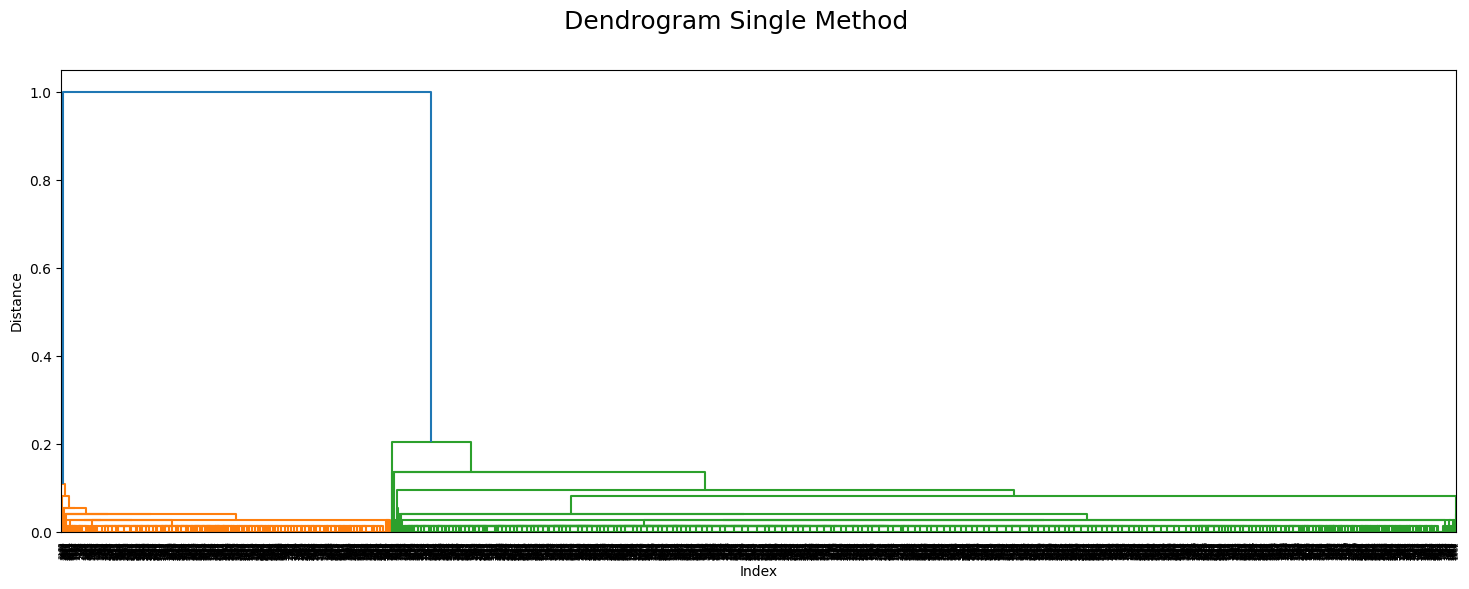

In [49]:
distance_single = linkage(filtered_df.loc[:,['BASEL_temp_mean','BASEL_pleasant_weather']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

### Looking at 0.4 distance line, there are 2 clusters in the Dendrogram Single Method plot.

In [50]:
df_SM=filtered_df.copy()

df_SM['clust2']=fcluster(distance_single,2, criterion='maxclust')
df_SM.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
10958 1990-01-01      1          -2.248803          -0.02793        0.645423   
10959 1990-01-02      1          -1.417570          -0.02793        0.735760   
10960 1990-01-03      1           1.076130          -0.02793        1.187444   
10961 1990-01-04      1          -1.417570          -0.02793        0.103401   
10962 1990-01-05      1           0.660514          -0.02793        0.464749   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
10958        0.563561               -0.800359            -0.445514   
10959        0.884527               -0.929233            -0.445514   
10960        0.777538               -1.229941            -0.445514   
10961        1.297196               -0.864796            -0.445514   
10962        1.618161               -1.197722            -0.365351   

       BASEL_snow_depth  BASEL_sunshine  ...  KASSEL_weather  \
10958         -0.179228        0.604953  ...      unpleasant   
10959         -0.179228       -0.531750  ...      unpleasant   
10960         -0.179228       -1.065304  ...      unpleasant   
10961         -0.179228        0.233784  ...      unpleasant   
10962         -0.179228       -1.018908  ...      unpleasant   

       LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  \
10958         unpleasant          unpleasant      unpleasant   
10959         unpleasant          unpleasant      unpleasant   
10960         unpleasant          unpleasant      unpleasant   
10961         unpleasant          unpleasant      unpleasant   
10962         unpleasant          unpleasant      unpleasant   

       MUNCHENB_weather  OSLO_weather  SONNBLICK_weather  STOCKHOLM_weather  \
10958        unpleasant    unpleasant         unpleasant         unpleasant   
10959        unpleasant    unpleasant         unpleasant         unpleasant   
10960        unpleasant    unpleasant         unpleasant         unpleasant   
10961        unpleasant    unpleasant         unpleasant         unpleasant   
10962        unpleasant    unpleasant         unpleasant         unpleasant   

       VALENTIA_weather  clust2  
10958        unpleasant       2  
10959        unpleasant       2  
10960        unpleasant       2  
10961        unpleasant       2  
10962        unpleasant       2  

[5 rows x 180 columns]

In [51]:
df_SM.shape

(3652, 180)

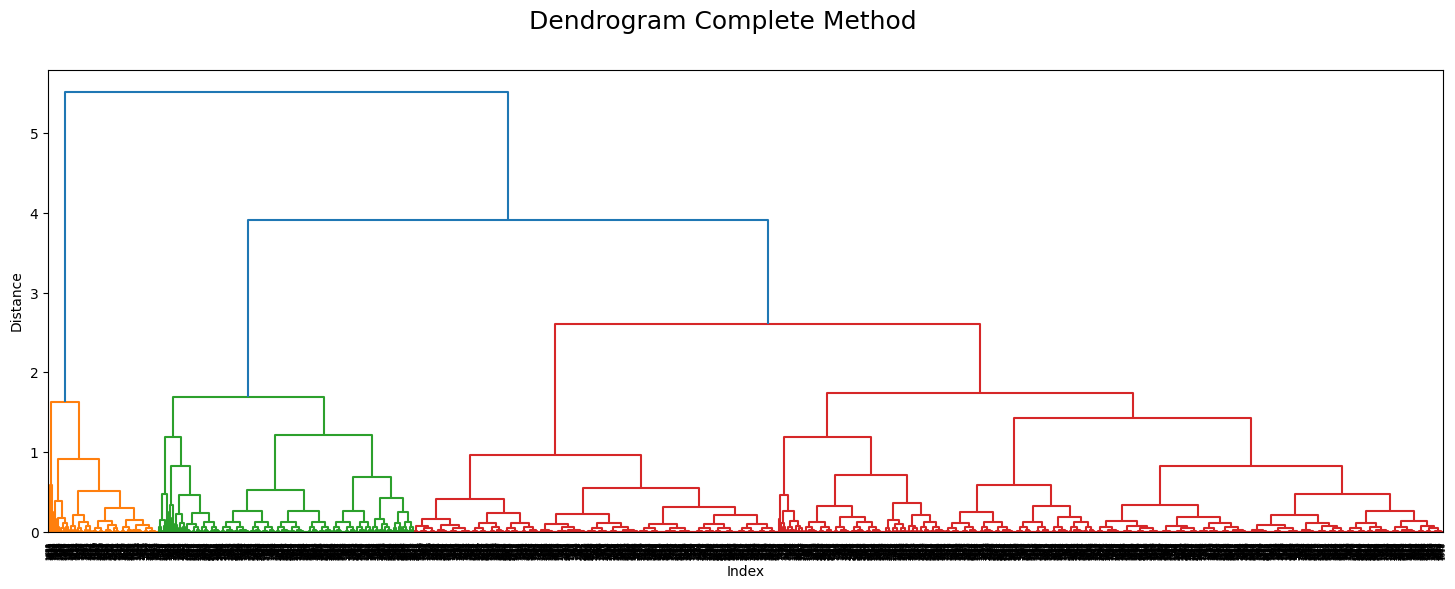

In [52]:
distance_complete = linkage(filtered_df.loc[:,['BASEL_temp_mean','BASEL_pleasant_weather']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

### Looking at 3 distance line, there are 3 clusters in the Dendrogram Complete Method plot. 

In [53]:
df_CM=filtered_df.copy()

df_CM['clust2']=fcluster(distance_complete,2, criterion='maxclust')
df_CM.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
10958 1990-01-01      1          -2.248803          -0.02793        0.645423   
10959 1990-01-02      1          -1.417570          -0.02793        0.735760   
10960 1990-01-03      1           1.076130          -0.02793        1.187444   
10961 1990-01-04      1          -1.417570          -0.02793        0.103401   
10962 1990-01-05      1           0.660514          -0.02793        0.464749   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
10958        0.563561               -0.800359            -0.445514   
10959        0.884527               -0.929233            -0.445514   
10960        0.777538               -1.229941            -0.445514   
10961        1.297196               -0.864796            -0.445514   
10962        1.618161               -1.197722            -0.365351   

       BASEL_snow_depth  BASEL_sunshine  ...  KASSEL_weather  \
10958         -0.179228        0.604953  ...      unpleasant   
10959         -0.179228       -0.531750  ...      unpleasant   
10960         -0.179228       -1.065304  ...      unpleasant   
10961         -0.179228        0.233784  ...      unpleasant   
10962         -0.179228       -1.018908  ...      unpleasant   

       LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  \
10958         unpleasant          unpleasant      unpleasant   
10959         unpleasant          unpleasant      unpleasant   
10960         unpleasant          unpleasant      unpleasant   
10961         unpleasant          unpleasant      unpleasant   
10962         unpleasant          unpleasant      unpleasant   

       MUNCHENB_weather  OSLO_weather  SONNBLICK_weather  STOCKHOLM_weather  \
10958        unpleasant    unpleasant         unpleasant         unpleasant   
10959        unpleasant    unpleasant         unpleasant         unpleasant   
10960        unpleasant    unpleasant         unpleasant         unpleasant   
10961        unpleasant    unpleasant         unpleasant         unpleasant   
10962        unpleasant    unpleasant         unpleasant         unpleasant   

       VALENTIA_weather  clust2  
10958        unpleasant       1  
10959        unpleasant       1  
10960        unpleasant       1  
10961        unpleasant       1  
10962        unpleasant       2  

[5 rows x 180 columns]

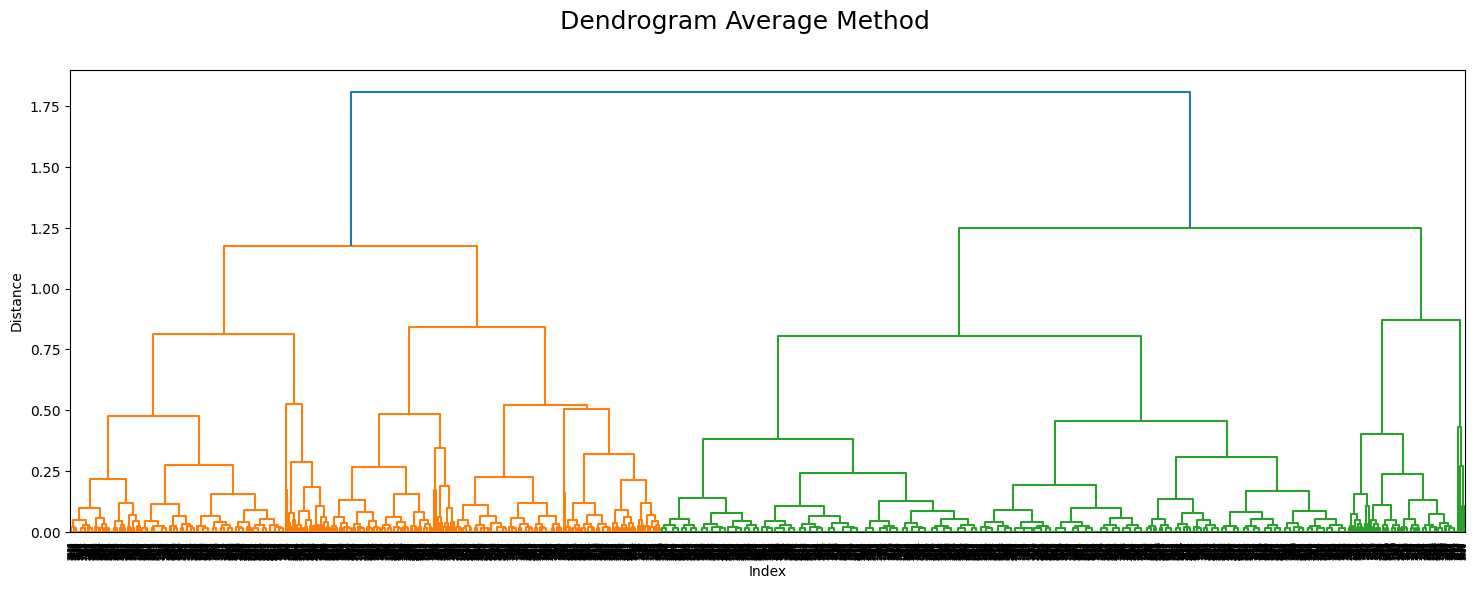

In [54]:
distance_average = linkage(filtered_df.loc[:,['BASEL_temp_mean','BASEL_pleasant_weather']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

### Looking at the 1.00 distance line, there are 4 clusters in the Dendrogram Average Method plot. You would have to go above the 1.25 distance line to get 2 clusters. 

In [55]:
df_AM=filtered_df.copy()

df_AM['clust2']=fcluster(distance_average,2, criterion='maxclust')
df_AM.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
10958 1990-01-01      1          -2.248803          -0.02793        0.645423   
10959 1990-01-02      1          -1.417570          -0.02793        0.735760   
10960 1990-01-03      1           1.076130          -0.02793        1.187444   
10961 1990-01-04      1          -1.417570          -0.02793        0.103401   
10962 1990-01-05      1           0.660514          -0.02793        0.464749   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
10958        0.563561               -0.800359            -0.445514   
10959        0.884527               -0.929233            -0.445514   
10960        0.777538               -1.229941            -0.445514   
10961        1.297196               -0.864796            -0.445514   
10962        1.618161               -1.197722            -0.365351   

       BASEL_snow_depth  BASEL_sunshine  ...  KASSEL_weather  \
10958         -0.179228        0.604953  ...      unpleasant   
10959         -0.179228       -0.531750  ...      unpleasant   
10960         -0.179228       -1.065304  ...      unpleasant   
10961         -0.179228        0.233784  ...      unpleasant   
10962         -0.179228       -1.018908  ...      unpleasant   

       LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  \
10958         unpleasant          unpleasant      unpleasant   
10959         unpleasant          unpleasant      unpleasant   
10960         unpleasant          unpleasant      unpleasant   
10961         unpleasant          unpleasant      unpleasant   
10962         unpleasant          unpleasant      unpleasant   

       MUNCHENB_weather  OSLO_weather  SONNBLICK_weather  STOCKHOLM_weather  \
10958        unpleasant    unpleasant         unpleasant         unpleasant   
10959        unpleasant    unpleasant         unpleasant         unpleasant   
10960        unpleasant    unpleasant         unpleasant         unpleasant   
10961        unpleasant    unpleasant         unpleasant         unpleasant   
10962        unpleasant    unpleasant         unpleasant         unpleasant   

       VALENTIA_weather  clust2  
10958        unpleasant       2  
10959        unpleasant       2  
10960        unpleasant       2  
10961        unpleasant       2  
10962        unpleasant       2  

[5 rows x 180 columns]

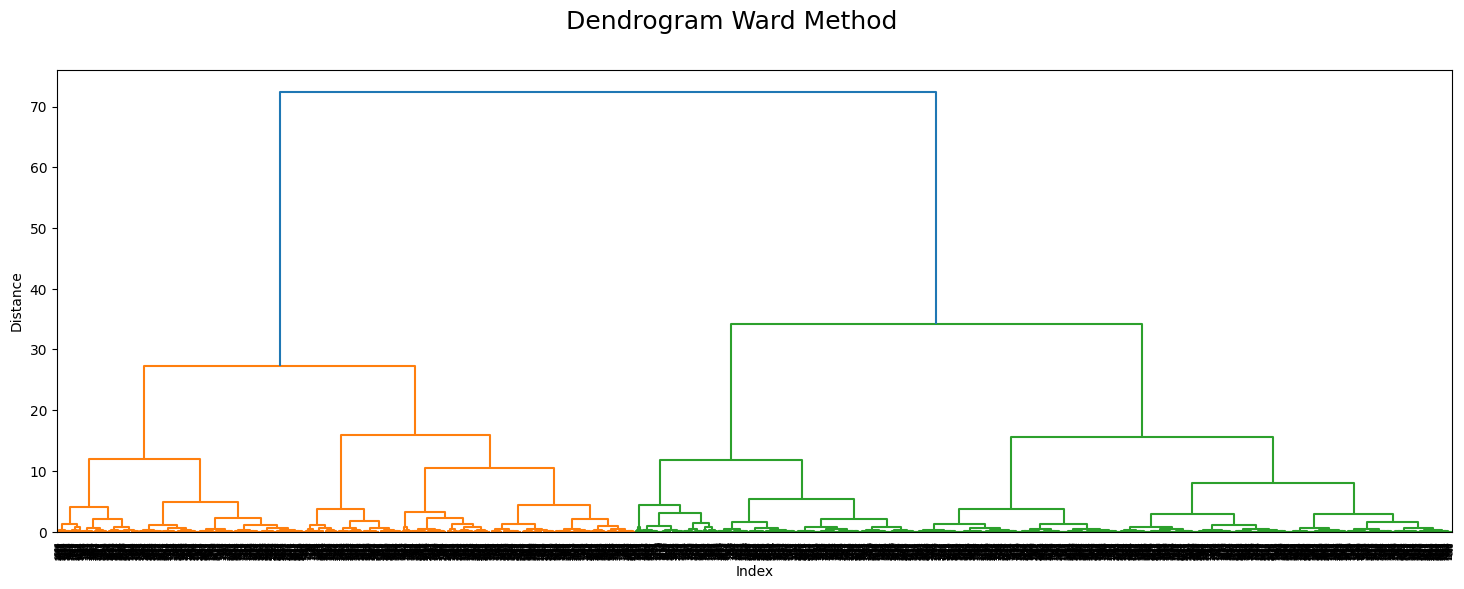

In [56]:
distance_ward = linkage(filtered_df.loc[:,['BASEL_temp_mean','BASEL_pleasant_weather']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

### Looking at the 40 distance line, there are 2 clusters in the Dendrogram Ward Method plot.

In [57]:
df_WM=filtered_df.copy()

df_WM['clust2']=fcluster(distance_ward,2, criterion='maxclust')
df_WM.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
10958 1990-01-01      1          -2.248803          -0.02793        0.645423   
10959 1990-01-02      1          -1.417570          -0.02793        0.735760   
10960 1990-01-03      1           1.076130          -0.02793        1.187444   
10961 1990-01-04      1          -1.417570          -0.02793        0.103401   
10962 1990-01-05      1           0.660514          -0.02793        0.464749   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
10958        0.563561               -0.800359            -0.445514   
10959        0.884527               -0.929233            -0.445514   
10960        0.777538               -1.229941            -0.445514   
10961        1.297196               -0.864796            -0.445514   
10962        1.618161               -1.197722            -0.365351   

       BASEL_snow_depth  BASEL_sunshine  ...  KASSEL_weather  \
10958         -0.179228        0.604953  ...      unpleasant   
10959         -0.179228       -0.531750  ...      unpleasant   
10960         -0.179228       -1.065304  ...      unpleasant   
10961         -0.179228        0.233784  ...      unpleasant   
10962         -0.179228       -1.018908  ...      unpleasant   

       LJUBLJANA_weather  MAASTRICHT_weather  MADRID_weather  \
10958         unpleasant          unpleasant      unpleasant   
10959         unpleasant          unpleasant      unpleasant   
10960         unpleasant          unpleasant      unpleasant   
10961         unpleasant          unpleasant      unpleasant   
10962         unpleasant          unpleasant      unpleasant   

       MUNCHENB_weather  OSLO_weather  SONNBLICK_weather  STOCKHOLM_weather  \
10958        unpleasant    unpleasant         unpleasant         unpleasant   
10959        unpleasant    unpleasant         unpleasant         unpleasant   
10960        unpleasant    unpleasant         unpleasant         unpleasant   
10961        unpleasant    unpleasant         unpleasant         unpleasant   
10962        unpleasant    unpleasant         unpleasant         unpleasant   

       VALENTIA_weather  clust2  
10958        unpleasant       2  
10959        unpleasant       2  
10960        unpleasant       2  
10961        unpleasant       2  
10962        unpleasant       2  

[5 rows x 180 columns]

In [58]:
#Look at all of the confusion matrices results together.
print("SINGLE")
print(pd.crosstab(df_SM["BASEL_temp_mean"],df_SM["clust2"]))
print("COMPLETE")
print(pd.crosstab(df_CM["BASEL_temp_mean"],df_CM["clust2"]))
print("AVERAGE")
print(pd.crosstab(df_AM["BASEL_temp_mean"],df_AM["clust2"]))
print("WARD")
print(pd.crosstab(df_WM["BASEL_temp_mean"],df_WM["clust2"]))

SINGLE
clust2           1  2
BASEL_temp_mean      
-3.054625        0  1
-2.850915        0  1
-2.837334        0  1
-2.810173        0  1
-2.674367        0  1
...             .. ..
 2.201089        1  1
 2.241831        2  0
 2.268992        1  0
 2.296153        1  0
 2.377637        1  0

[333 rows x 2 columns]
COMPLETE
clust2           1  2
BASEL_temp_mean      
-3.054625        1  0
-2.850915        1  0
-2.837334        1  0
-2.810173        1  0
-2.674367        1  0
...             .. ..
 2.201089        0  2
 2.241831        0  2
 2.268992        0  1
 2.296153        0  1
 2.377637        0  1

[333 rows x 2 columns]
AVERAGE
clust2           1  2
BASEL_temp_mean      
-3.054625        0  1
-2.850915        0  1
-2.837334        0  1
-2.810173        0  1
-2.674367        0  1
...             .. ..
 2.201089        2  0
 2.241831        2  0
 2.268992        1  0
 2.296153        1  0
 2.377637        1  0

[333 rows x 2 columns]
WARD
clust2           1  2
BASEL_temp_mean    

## Dendogram Ward Method on all weather stations for all years

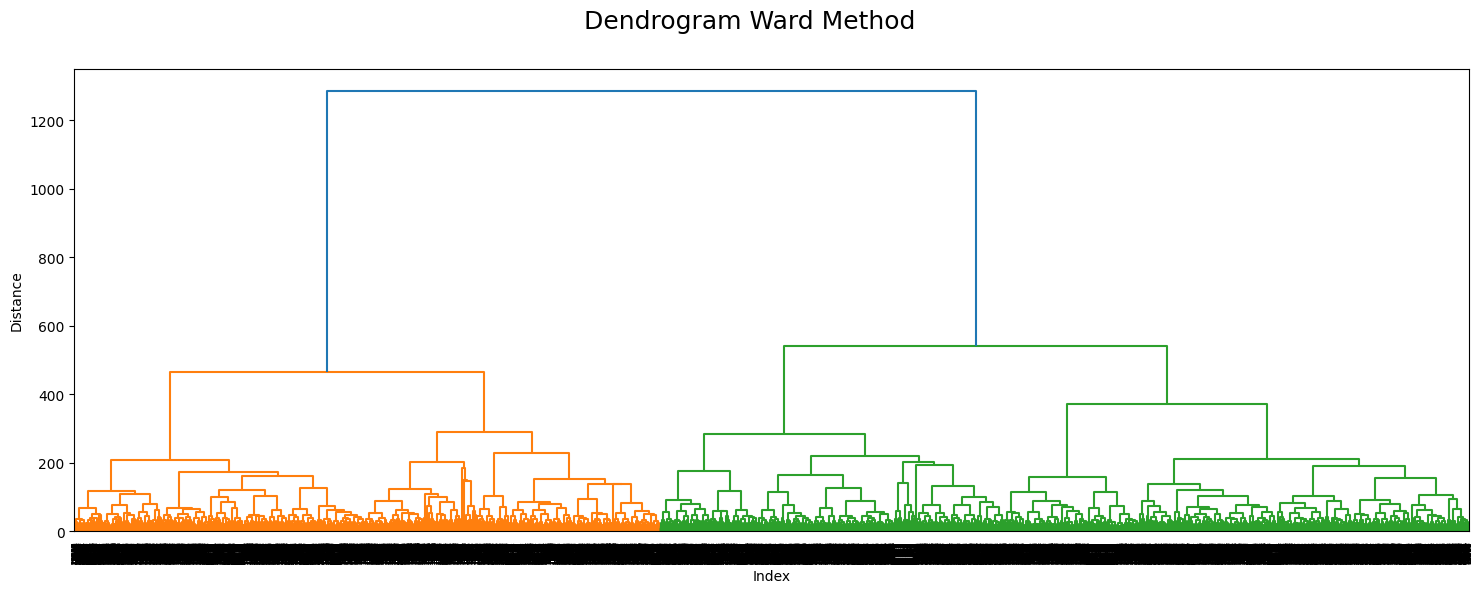

In [59]:
distance_ward_all = linkage(df_merged2.loc[:,['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_snow_depth', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max', 'KASSEL_wind_speed', 'KASSEL_humidity', 'KASSEL_pressure', 'KASSEL_global_radiation', 'KASSEL_precipitation', 'KASSEL_sunshine', 'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max', 'LJUBLJANA_cloud_cover', 'LJUBLJANA_wind_speed', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max', 'MAASTRICHT_cloud_cover', 'MAASTRICHT_wind_speed', 'MAASTRICHT_humidity', 'MAASTRICHT_pressure', 'MAASTRICHT_global_radiation', 'MAASTRICHT_precipitation', 'MAASTRICHT_sunshine', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max', 'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max', 'MUNCHENB_cloud_cover', 'MUNCHENB_humidity', 'MUNCHENB_global_radiation', 'MUNCHENB_precipitation', 'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_snow_depth', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max', 'SONNBLICK_cloud_cover', 'SONNBLICK_wind_speed', 'SONNBLICK_humidity', 'SONNBLICK_pressure', 'SONNBLICK_global_radiation', 'SONNBLICK_precipitation', 'SONNBLICK_sunshine', 'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max', 'STOCKHOLM_cloud_cover', 'STOCKHOLM_pressure', 'STOCKHOLM_global_radiation', 'STOCKHOLM_precipitation', 'STOCKHOLM_sunshine', 'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation', 'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward_all, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

### Looking at the 600 distance line, there are 2 clusters in the Dendrogram Ward Method plot for all weather stations and all years of data.

In [60]:
df_WM_all=df_merged2.copy()

df_WM_all['clust2']=fcluster(distance_ward_all,2, criterion='maxclust')
df_WM_all.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0 1960-01-01      1           0.660514          -0.02793        0.826097   
1 1960-01-02      1           0.244897          -0.02793        0.735760   
2 1960-01-03      1           1.076130          -0.02793        1.277781   
3 1960-01-04      1          -1.001953          -0.02793        1.458455   
4 1960-01-05      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  KASSEL_weather  LJUBLJANA_weather  \
0         -0.179228       -0.902918  ...      unpleasant         unpleasant   
1         -0.179228       -0.810126  ...      unpleasant         unpleasant   
2         -0.179228       -1.065304  ...      unpleasant         unpleasant   
3         -0.179228       -0.114186  ...      unpleasant         unpleasant   
4         -0.179228        0.187388  ...      unpleasant         unpleasant   

   MAASTRICHT_weather  MADRID_weather  MUNCHENB_weather  OSLO_weather  \
0          unpleasant      unpleasant        unpleasant    unpleasant   
1          unpleasant      unpleasant        unpleasant    unpleasant   
2          unpleasant      unpleasant        unpleasant    unpleasant   
3          unpleasant      unpleasant        unpleasant    unpleasant   
4          unpleasant      unpleasant        unpleasant    unpleasant   

   SONNBLICK_weather  STOCKHOLM_weather  VALENTIA_weather  clust2  
0         unpleasant         unpleasant        unpleasant       1  
1         unpleasant         unpleasant        unpleasant       1  
2         unpleasant         unpleasant        unpleasant       1  
3         unpleasant         unpleasant        unpleasant       1  
4         unpleasant         unpleasant        unpleasant       1  

[5 rows x 180 columns]

## PCA - All Weather Stations for 1960 - 2022

In [61]:
features = df_merged2[['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_snow_depth', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max', 'KASSEL_wind_speed', 'KASSEL_humidity', 'KASSEL_pressure', 'KASSEL_global_radiation', 'KASSEL_precipitation', 'KASSEL_sunshine', 'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max', 'LJUBLJANA_cloud_cover', 'LJUBLJANA_wind_speed', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max', 'MAASTRICHT_cloud_cover', 'MAASTRICHT_wind_speed', 'MAASTRICHT_humidity', 'MAASTRICHT_pressure', 'MAASTRICHT_global_radiation', 'MAASTRICHT_precipitation', 'MAASTRICHT_sunshine', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max', 'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max', 'MUNCHENB_cloud_cover', 'MUNCHENB_humidity', 'MUNCHENB_global_radiation', 'MUNCHENB_precipitation', 'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_snow_depth', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max', 'SONNBLICK_cloud_cover', 'SONNBLICK_wind_speed', 'SONNBLICK_humidity', 'SONNBLICK_pressure', 'SONNBLICK_global_radiation', 'SONNBLICK_precipitation', 'SONNBLICK_sunshine', 'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max', 'STOCKHOLM_cloud_cover', 'STOCKHOLM_pressure', 'STOCKHOLM_global_radiation', 'STOCKHOLM_precipitation', 'STOCKHOLM_sunshine', 'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation', 'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max']]

In [63]:
#Run the PCA model, reducing to two components
pca_all = PCA(n_components=2)
principalComponents_all = pca_all.fit_transform(features)

In [64]:
principalComponents_all

array([[ 6.39617052,  3.57353151],
       [ 6.8454112 ,  3.67392552],
       [ 7.1514429 ,  2.68174987],
       ...,
       [-3.51988236,  0.72205303],
       [-2.53795426,  0.35153528],
       [-1.07780951,  1.43581021]])

In [65]:
#Make a dataframe of the new components
dfPCA_all = pd.DataFrame(principalComponents_all, columns=['PCA1', 'PCA2'])

In [66]:
dfPCA_all

PCA1      PCA2
0      6.396171  3.573532
1      6.845411  3.673926
2      7.151443  2.681750
3      7.674213  0.221483
4      7.387268  0.437302
...         ...       ...
22945 -3.190210  0.196281
22946 -3.423891  0.858501
22947 -3.519882  0.722053
22948 -2.537954  0.351535
22949 -1.077810  1.435810

[22950 rows x 2 columns]

In [67]:
#Add the BASEL_pleasant_weather to the dataframe to show the relationship
KASSEL_pleasant_weather = [answers['KASSEL_pleasant_weather']]
KASSEL_pleasant_weather

[0        0
 1        0
 2        0
 3        0
 4        0
         ..
 22945    0
 22946    0
 22947    0
 22948    0
 22949    0
 Name: KASSEL_pleasant_weather, Length: 22950, dtype: int64]

In [68]:
dfPCA_all['KASSEL_pleasant_weather']= answers['KASSEL_pleasant_weather']

In [69]:
dfPCA_all

PCA1      PCA2  KASSEL_pleasant_weather
0      6.396171  3.573532                        0
1      6.845411  3.673926                        0
2      7.151443  2.681750                        0
3      7.674213  0.221483                        0
4      7.387268  0.437302                        0
...         ...       ...                      ...
22945 -3.190210  0.196281                        0
22946 -3.423891  0.858501                        0
22947 -3.519882  0.722053                        0
22948 -2.537954  0.351535                        0
22949 -1.077810  1.435810                        0

[22950 rows x 3 columns]

In [70]:
# Check the min

dfPCA_all['KASSEL_pleasant_weather'].min()

0

In [71]:
# Check the max

dfPCA_all['KASSEL_pleasant_weather'].max()

1

In [72]:
dfPCA_all['clust2']=fcluster(distance_ward_all,2, criterion='maxclust')

In [73]:
dfPCA_all

PCA1      PCA2  KASSEL_pleasant_weather  clust2
0      6.396171  3.573532                        0       1
1      6.845411  3.673926                        0       1
2      7.151443  2.681750                        0       1
3      7.674213  0.221483                        0       1
4      7.387268  0.437302                        0       1
...         ...       ...                      ...     ...
22945 -3.190210  0.196281                        0       2
22946 -3.423891  0.858501                        0       2
22947 -3.519882  0.722053                        0       2
22948 -2.537954  0.351535                        0       2
22949 -1.077810  1.435810                        0       2

[22950 rows x 4 columns]

<Axes: title={'center': 'Weather Station'}, xlabel='PCA1', ylabel='PCA2'>

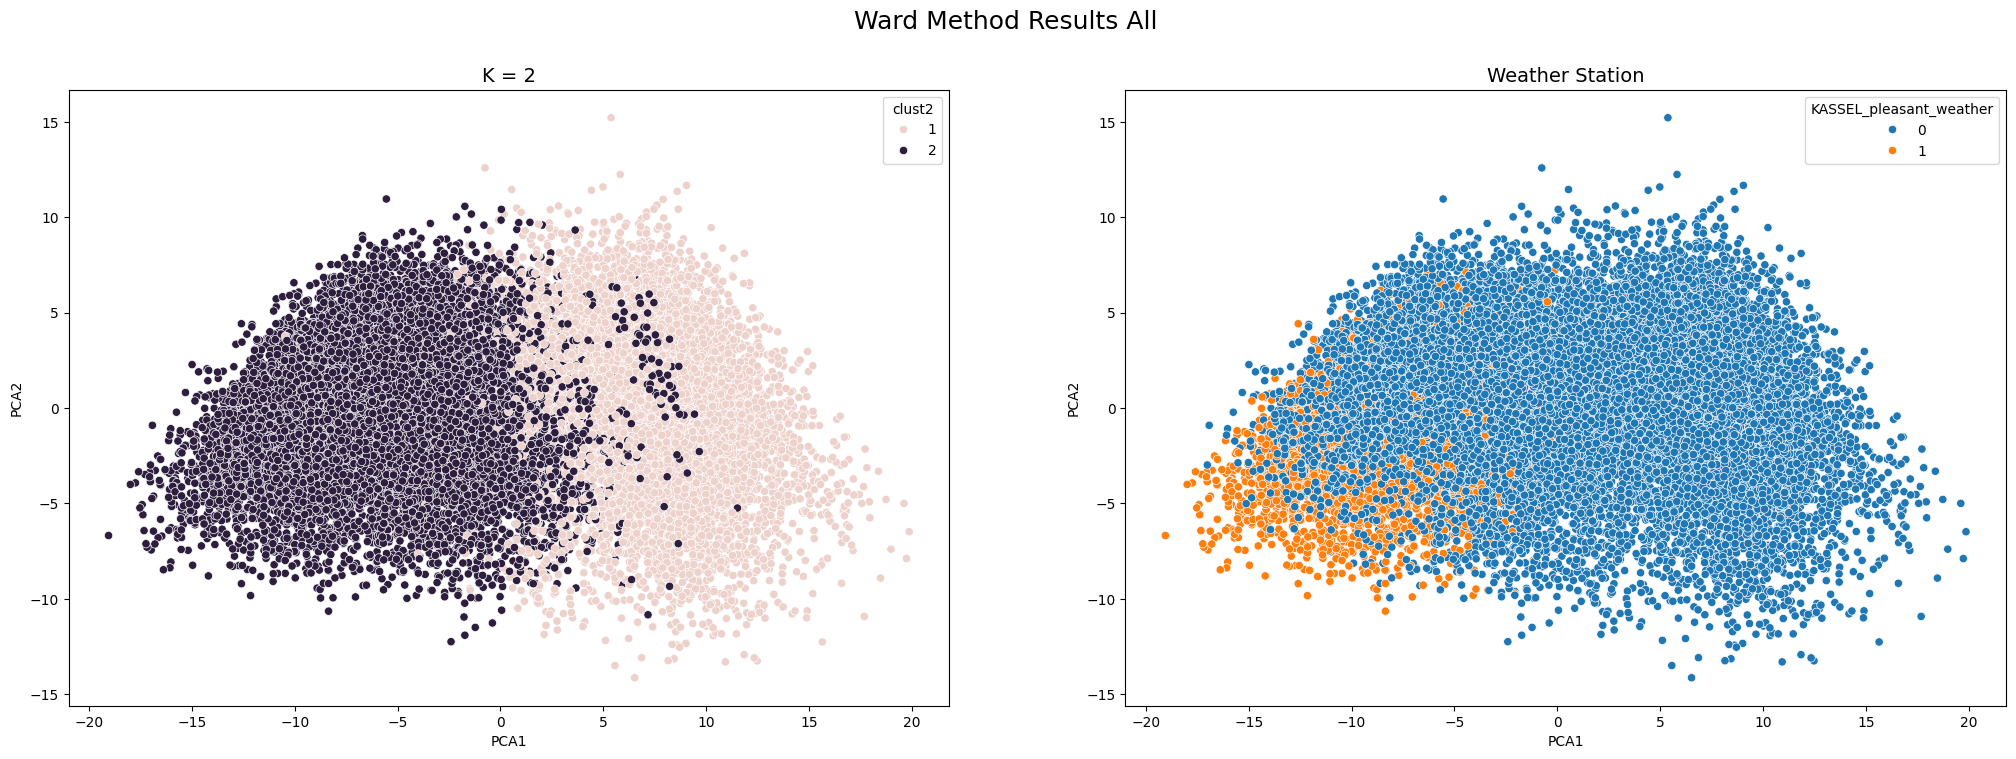

In [74]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle('Ward Method Results All',fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA_all, hue="clust2")

plt.subplot(1,2,2)
plt.title("Weather Station",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA_all, hue='KASSEL_pleasant_weather')

<Axes: title={'center': 'K = 2'}, xlabel='PCA1', ylabel='PCA2'>

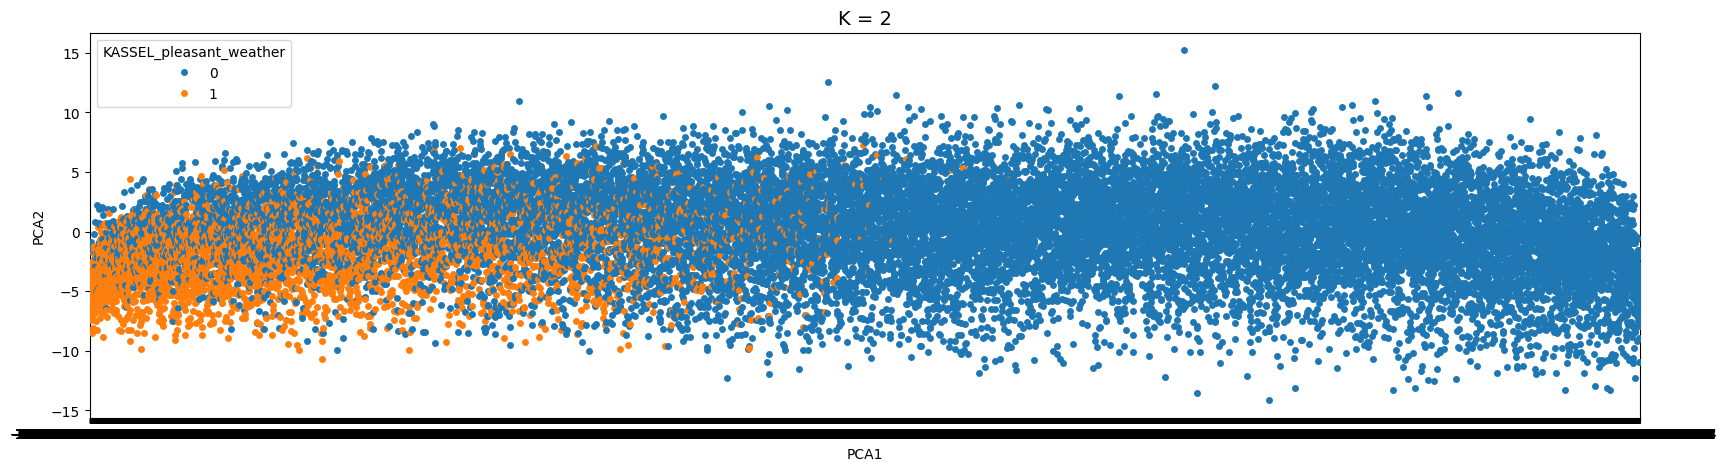

In [75]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x='PCA1',y='PCA2', data=dfPCA_all, hue='KASSEL_pleasant_weather')

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


([<matplotlib.axis.XTick at 0x27df022e550>,
 [Text(0, 0, '-19.048461599891212'),
  Text(40, 0, '-16.063868268334158'),
  Text(80, 0, '-15.480426170430803'),
  Text(120, 0, '-14.860367628201345'),
  Text(149, 0, '-14.524737643057893')])

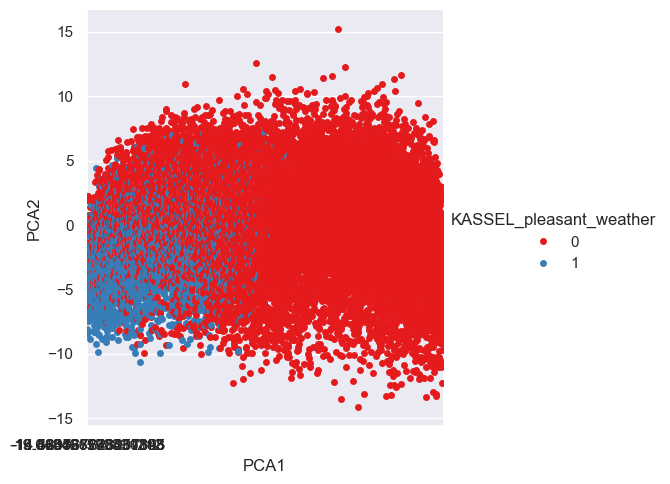

In [76]:
#Plot the two components, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="KASSEL_pleasant_weather", data=dfPCA_all)
plt.xticks([0, 40, 80, 120, 149])

## PCA - BASEL Weather Station - 1990's

In [77]:
features = filtered_df[['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']]

In [78]:
#Run the PCA model, reducing to two components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

In [79]:
principalComponents

array([[-1.58609453, -2.53465256],
       [-2.32496333, -2.07161125],
       [-3.5657281 , -0.87789026],
       ...,
       [-2.82362955,  0.151872  ],
       [-2.63179815, -1.24614313],
       [-2.97422007, -0.88848403]])

In [80]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

In [81]:
dfPCA

PCA1      PCA2
0    -1.586095 -2.534653
1    -2.324963 -2.071611
2    -3.565728 -0.877890
3    -1.700143 -2.555992
4    -2.960752 -1.465438
...        ...       ...
3647 -1.955222  3.488173
3648 -2.842805  3.127287
3649 -2.823630  0.151872
3650 -2.631798 -1.246143
3651 -2.974220 -0.888484

[3652 rows x 2 columns]

In [82]:
#Add the BASEL_pleasant_weather to the dataframe to show the relationship
BASEL_pleasant_weather = [answers['BASEL_pleasant_weather']]
BASEL_pleasant_weather

[0        0
 1        0
 2        0
 3        0
 4        0
         ..
 22945    0
 22946    0
 22947    0
 22948    0
 22949    0
 Name: BASEL_pleasant_weather, Length: 22950, dtype: int64]

In [83]:
dfPCA['BASEL_pleasant_weather']= answers['BASEL_pleasant_weather']

In [84]:
dfPCA

PCA1      PCA2  BASEL_pleasant_weather
0    -1.586095 -2.534653                       0
1    -2.324963 -2.071611                       0
2    -3.565728 -0.877890                       0
3    -1.700143 -2.555992                       0
4    -2.960752 -1.465438                       0
...        ...       ...                     ...
3647 -1.955222  3.488173                       0
3648 -2.842805  3.127287                       0
3649 -2.823630  0.151872                       0
3650 -2.631798 -1.246143                       0
3651 -2.974220 -0.888484                       0

[3652 rows x 3 columns]

In [85]:
# Check the min

dfPCA['BASEL_pleasant_weather'].min()

0

In [86]:
# Check the max

dfPCA['BASEL_pleasant_weather'].max()

1

In [87]:
dfPCA['clust2']=fcluster(distance_ward,2, criterion='maxclust')

In [120]:
dfPCA

PCA1      PCA2  BASEL_pleasant_weather  clust2
0    -1.586095 -2.534653                       0       2
1    -2.324963 -2.071611                       0       2
2    -3.565728 -0.877890                       0       2
3    -1.700143 -2.555992                       0       2
4    -2.960752 -1.465438                       0       2
...        ...       ...                     ...     ...
3647 -1.955222  3.488173                       0       2
3648 -2.842805  3.127287                       0       2
3649 -2.823630  0.151872                       0       2
3650 -2.631798 -1.246143                       0       2
3651 -2.974220 -0.888484                       0       2

[3652 rows x 4 columns]

<Axes: title={'center': 'Weather Station'}, xlabel='PCA1', ylabel='PCA2'>

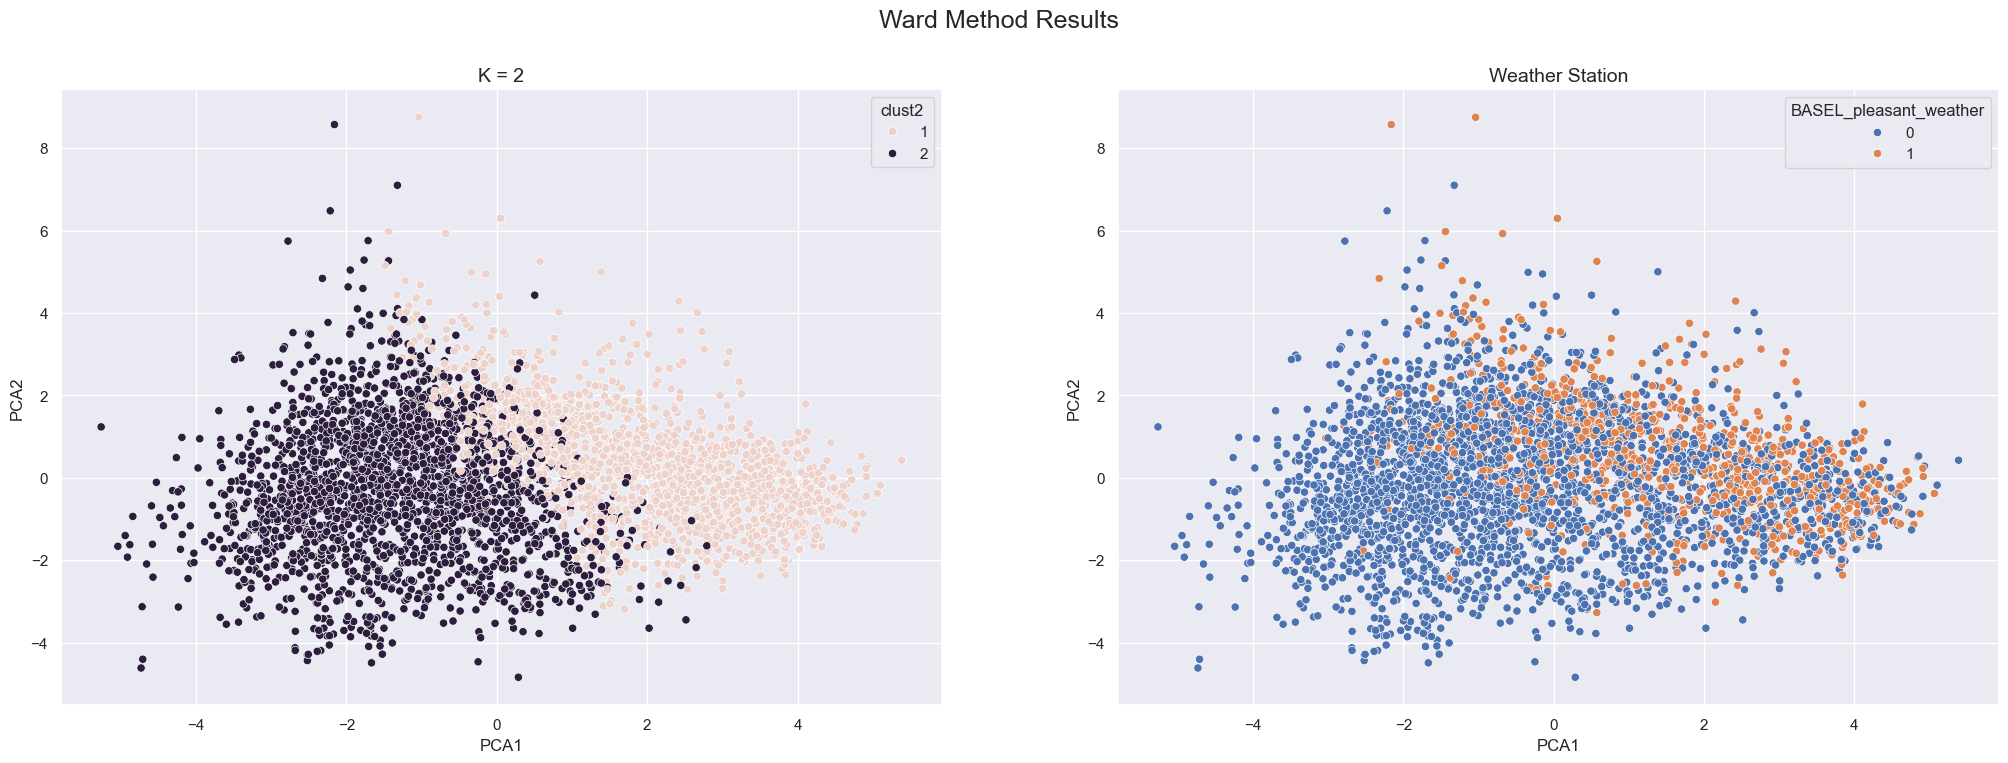

In [88]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle('Ward Method Results',fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA, hue="clust2")

plt.subplot(1,2,2)
plt.title("Weather Station",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA, hue='BASEL_pleasant_weather')

<Axes: title={'center': 'K = 2'}, xlabel='PCA1', ylabel='PCA2'>

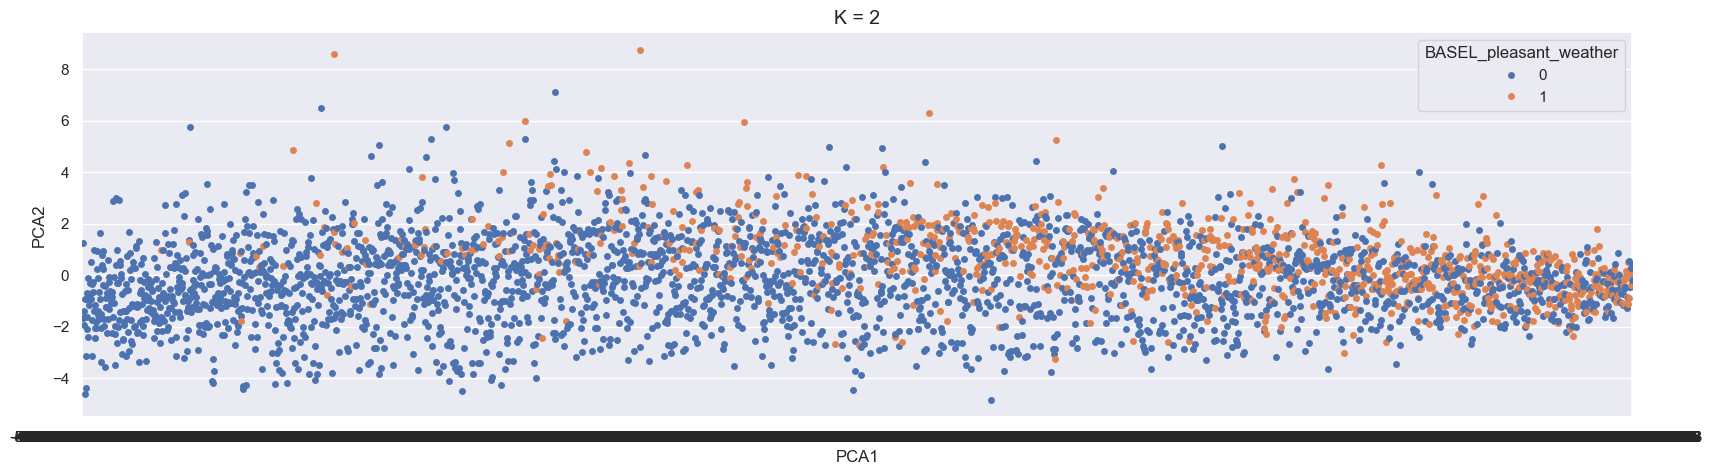

In [89]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x='PCA1',y='PCA2', data=dfPCA, hue='BASEL_pleasant_weather')

([<matplotlib.axis.XTick at 0x27de50534d0>,
 [Text(0, 0, '-5.262847578799247'),
  Text(40, 0, '-3.716982614674458'),
  Text(80, 0, '-3.428683784948218'),
  Text(120, 0, '-3.257337161355819'),
  Text(149, 0, '-3.1332367286828915')])

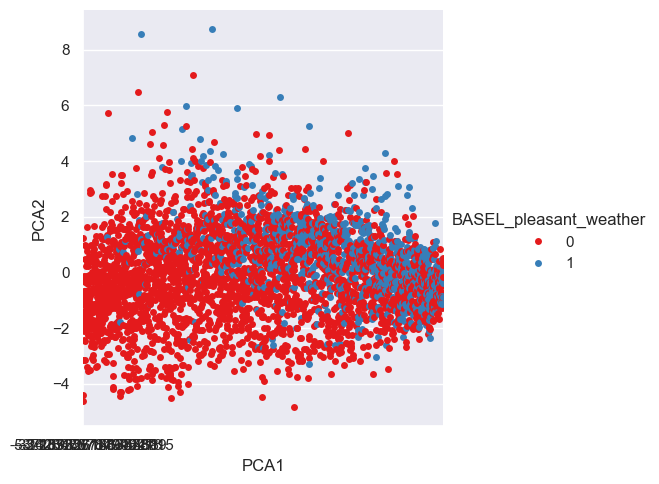

In [90]:
#Plot the two components, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="BASEL_pleasant_weather", data=dfPCA)
plt.xticks([0, 40, 80, 120, 149])

## PCA - HEATHROW Weather Station - 1990's

In [91]:
features2 = filtered_df[['HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max']]

In [92]:
#Run the PCA model, reducing to two components
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(features2)

In [93]:
principalComponents2

array([[-2.99132966,  0.14039981],
       [-3.06844381, -0.77605669],
       [-2.85834459, -0.39683712],
       ...,
       [-1.99462217, -2.23867606],
       [-3.45998564,  0.10817594],
       [-2.89726413,  0.10435548]])

In [94]:
#Make a dataframe of the new components
dfPCA2 = pd.DataFrame(principalComponents2, columns=['PCA1', 'PCA2'])

In [95]:
dfPCA2

PCA1      PCA2
0    -2.991330  0.140400
1    -3.068444 -0.776057
2    -2.858345 -0.396837
3    -2.106642 -0.840483
4    -2.506957 -0.091426
...        ...       ...
3647 -3.191482 -0.124232
3648 -2.990794 -0.198535
3649 -1.994622 -2.238676
3650 -3.459986  0.108176
3651 -2.897264  0.104355

[3652 rows x 2 columns]

In [96]:
#Add the HEATHROW_pleasant_weather to the dataframe to show the relationship
HEATHROW_pleasant_weather = [answers['HEATHROW_pleasant_weather']]
HEATHROW_pleasant_weather

[0        0
 1        0
 2        0
 3        0
 4        0
         ..
 22945    0
 22946    0
 22947    0
 22948    0
 22949    0
 Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64]

In [97]:
dfPCA2['HEATHROW_pleasant_weather']= answers['HEATHROW_pleasant_weather']

In [98]:
dfPCA2

PCA1      PCA2  HEATHROW_pleasant_weather
0    -2.991330  0.140400                          0
1    -3.068444 -0.776057                          0
2    -2.858345 -0.396837                          0
3    -2.106642 -0.840483                          0
4    -2.506957 -0.091426                          0
...        ...       ...                        ...
3647 -3.191482 -0.124232                          0
3648 -2.990794 -0.198535                          0
3649 -1.994622 -2.238676                          0
3650 -3.459986  0.108176                          0
3651 -2.897264  0.104355                          0

[3652 rows x 3 columns]

In [99]:
dfPCA2['HEATHROW_pleasant_weather'].min()

0

In [100]:
dfPCA2['HEATHROW_pleasant_weather'].max()

1

In [101]:
dfPCA2['clust2']=fcluster(distance_ward,2, criterion='maxclust')

In [121]:
dfPCA2

PCA1      PCA2  HEATHROW_pleasant_weather  clust2
0    -2.991330  0.140400                          0       2
1    -3.068444 -0.776057                          0       2
2    -2.858345 -0.396837                          0       2
3    -2.106642 -0.840483                          0       2
4    -2.506957 -0.091426                          0       2
...        ...       ...                        ...     ...
3647 -3.191482 -0.124232                          0       2
3648 -2.990794 -0.198535                          0       2
3649 -1.994622 -2.238676                          0       2
3650 -3.459986  0.108176                          0       2
3651 -2.897264  0.104355                          0       2

[3652 rows x 4 columns]

<Axes: title={'center': 'Weather Station'}, xlabel='PCA1', ylabel='PCA2'>

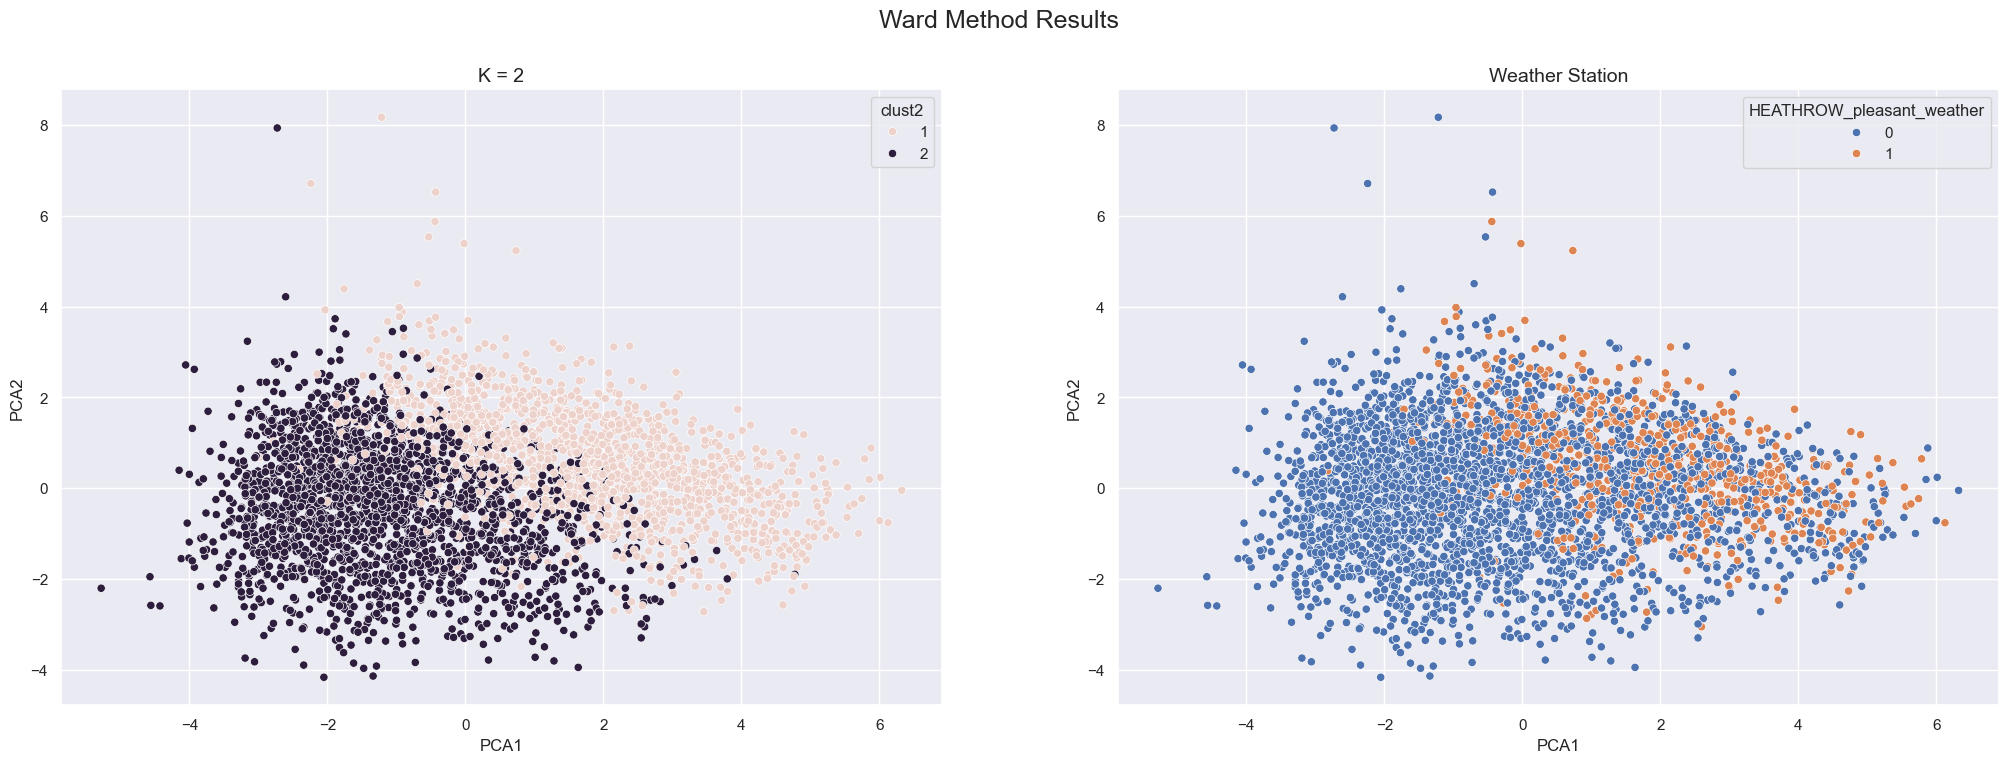

In [102]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle('Ward Method Results',fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA2, hue="clust2")

plt.subplot(1,2,2)
plt.title("Weather Station",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA2, hue='HEATHROW_pleasant_weather')

<Axes: title={'center': 'K = 2'}, xlabel='PCA1', ylabel='PCA2'>

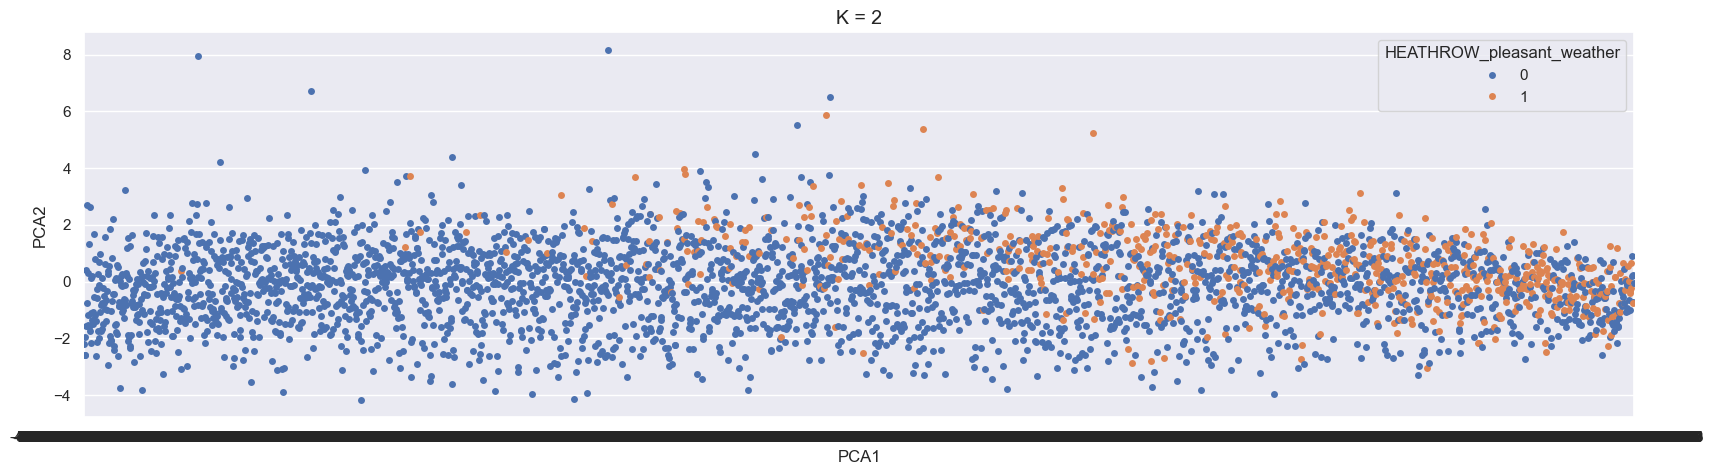

In [103]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x='PCA1',y='PCA2', data=dfPCA2, hue='HEATHROW_pleasant_weather')

([<matplotlib.axis.XTick at 0x27e4fd90b10>,
 [Text(0, 0, '-5.279389105057177'),
  Text(40, 0, '-3.480552309485296'),
  Text(80, 0, '-3.206664794044743'),
  Text(120, 0, '-3.082781691652454'),
  Text(149, 0, '-3.0084635898338474')])

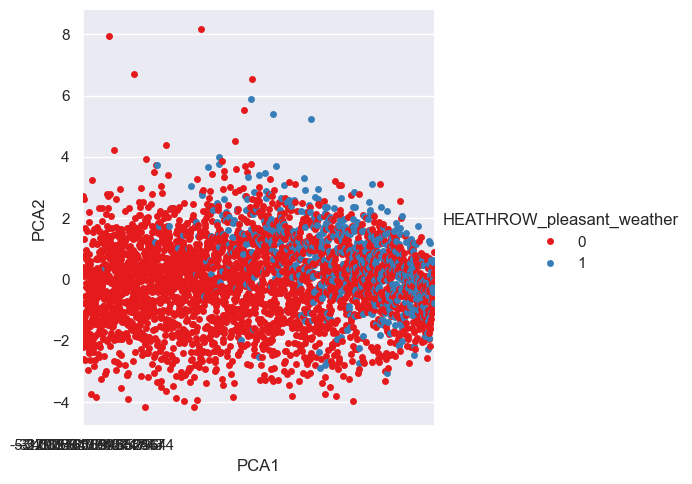

In [104]:
#Plot the two components, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="HEATHROW_pleasant_weather", data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

## PCA - OSLO Weather Station - 1990's

In [105]:
features3 = filtered_df[[ 'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_snow_depth', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max']]

In [106]:
#Run the PCA model, reducing to two components
pca3 = PCA(n_components=2)
principalComponents3 = pca3.fit_transform(features3)

In [107]:
principalComponents3

array([[-2.87648355, -1.76505443],
       [-2.60051533, -1.18190978],
       [-2.83004411, -1.43856666],
       ...,
       [-2.10458948, -0.78885628],
       [-2.46384364, -2.13850383],
       [-3.76144317, -1.30631821]])

In [108]:
#Make a dataframe of the new components
dfPCA3 = pd.DataFrame(principalComponents3, columns=['PCA1', 'PCA2'])

In [109]:
dfPCA3

PCA1      PCA2
0    -2.876484 -1.765054
1    -2.600515 -1.181910
2    -2.830044 -1.438567
3    -2.738870 -0.572496
4    -2.378510 -0.229230
...        ...       ...
3647 -2.326198  1.233557
3648 -2.401512  0.515604
3649 -2.104589 -0.788856
3650 -2.463844 -2.138504
3651 -3.761443 -1.306318

[3652 rows x 2 columns]

In [110]:
#Add the OSLO_pleasant_weather to the dataframe to show the relationship
OSLO_pleasant_weather = [answers['OSLO_pleasant_weather']]
OSLO_pleasant_weather

[0        0
 1        0
 2        0
 3        0
 4        0
         ..
 22945    0
 22946    0
 22947    0
 22948    0
 22949    0
 Name: OSLO_pleasant_weather, Length: 22950, dtype: int64]

In [111]:
dfPCA3['OSLO_pleasant_weather']= answers['OSLO_pleasant_weather']

In [112]:
dfPCA3

PCA1      PCA2  OSLO_pleasant_weather
0    -2.876484 -1.765054                      0
1    -2.600515 -1.181910                      0
2    -2.830044 -1.438567                      0
3    -2.738870 -0.572496                      0
4    -2.378510 -0.229230                      0
...        ...       ...                    ...
3647 -2.326198  1.233557                      0
3648 -2.401512  0.515604                      0
3649 -2.104589 -0.788856                      0
3650 -2.463844 -2.138504                      0
3651 -3.761443 -1.306318                      0

[3652 rows x 3 columns]

In [113]:
dfPCA3['OSLO_pleasant_weather'].min()

0

In [114]:
dfPCA3['OSLO_pleasant_weather'].max()

1

In [115]:
dfPCA3['clust2']=fcluster(distance_ward,2, criterion='maxclust')

In [122]:
dfPCA3

PCA1      PCA2  OSLO_pleasant_weather  clust2
0    -2.876484 -1.765054                      0       2
1    -2.600515 -1.181910                      0       2
2    -2.830044 -1.438567                      0       2
3    -2.738870 -0.572496                      0       2
4    -2.378510 -0.229230                      0       2
...        ...       ...                    ...     ...
3647 -2.326198  1.233557                      0       2
3648 -2.401512  0.515604                      0       2
3649 -2.104589 -0.788856                      0       2
3650 -2.463844 -2.138504                      0       2
3651 -3.761443 -1.306318                      0       2

[3652 rows x 4 columns]

<Axes: title={'center': 'Weather Station'}, xlabel='PCA1', ylabel='PCA2'>

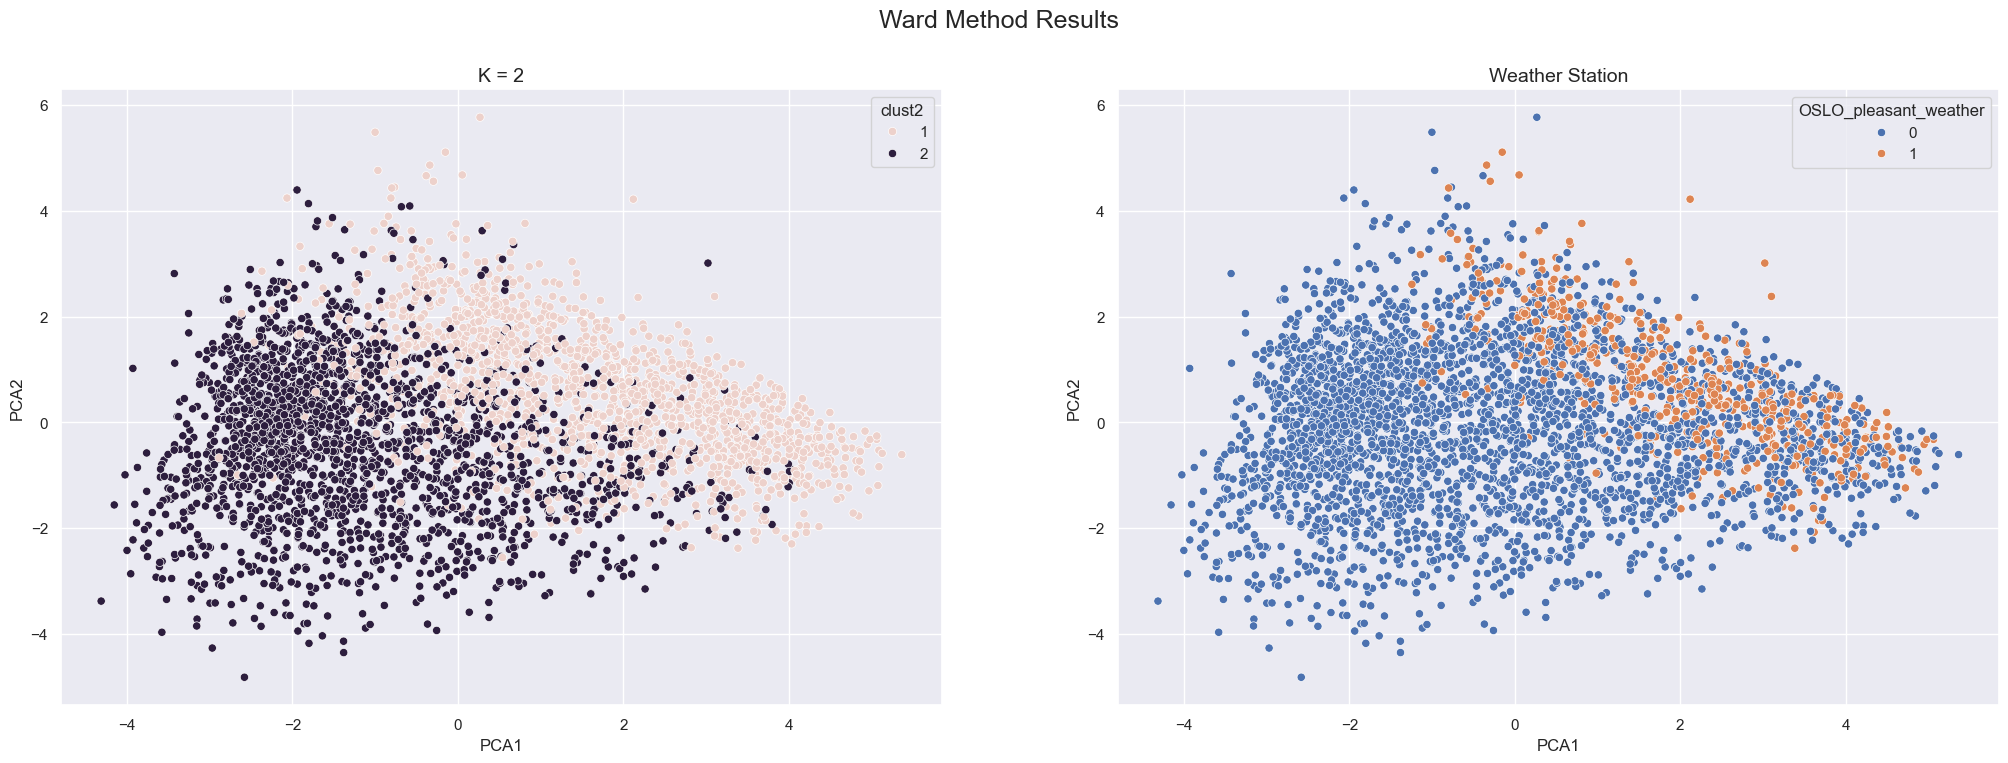

In [116]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle('Ward Method Results',fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA3, hue="clust2")

plt.subplot(1,2,2)
plt.title("Weather Station",fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA3, hue='OSLO_pleasant_weather')

<Axes: title={'center': 'K = 2'}, xlabel='PCA1', ylabel='PCA2'>

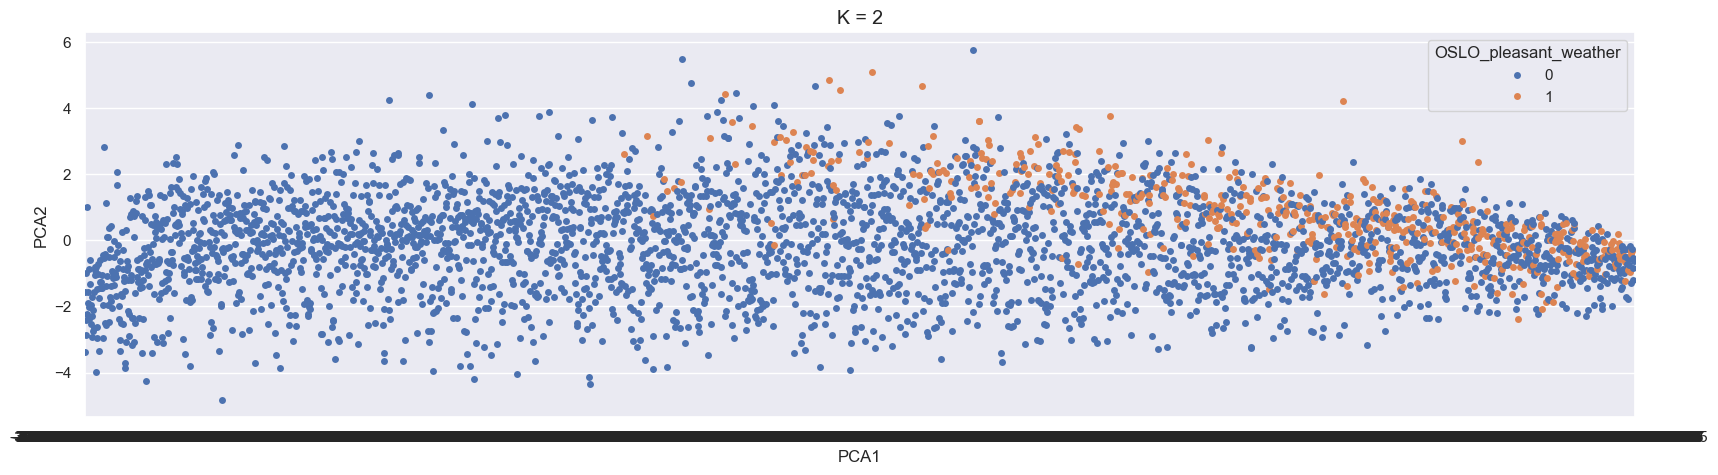

In [117]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x='PCA1',y='PCA2', data=dfPCA3, hue='OSLO_pleasant_weather')

([<matplotlib.axis.XTick at 0x27e63ed1810>,
 [Text(0, 0, '-4.312009940045713'),
  Text(40, 0, '-3.4678971059190893'),
  Text(80, 0, '-3.2356808716388965'),
  Text(120, 0, '-3.0463685828449667'),
  Text(149, 0, '-2.9610720801181105')])

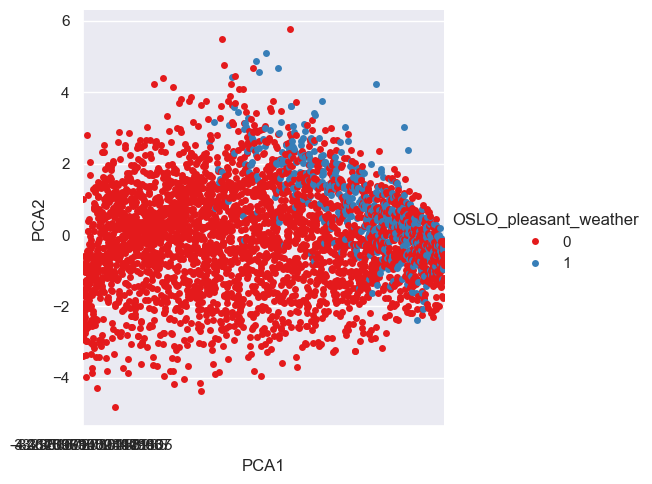

In [118]:
#Plot the two components, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="OSLO_pleasant_weather", data=dfPCA3)
plt.xticks([0, 40, 80, 120, 149])

In [119]:
# Export scaled data
filtered_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '1990s_filtered_weather_prediction_dataset_scaled.pkl'))